In [51]:
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
import neuralnetworks as nn
import time
import matplotlib.pyplot as plt
import multiprocessing as mp
import itertools
%matplotlib inline

In [2]:
def pickTargetVar(data,tIndex, names=None):
    # usage: X, T, Xnames, Tname = pickTargetVar(data, tIndex, names)
    T = data[:,tIndex:tIndex+1]
    X = np.delete(data,tIndex,axis=1)
    Tname = None
    Xnames = None
    if names:
        Tname = names[tIndex]
        Xnames = names[:]
        Xnames.remove(names[tIndex])
    return X, T, Xnames, Tname

In [3]:
def trainNN(X,T,parameters):
    start = time.time()
    print('training model...')
    nnet = nn.NeuralNetwork(X.shape[1],parameters[0],T.shape[1])
    model = nnet.train(X, T, nIterations=parameters[1])
    print('trained model ',nnet,' for ',time.time()-start,'seconds')
    return model

In [57]:
def trainNNWorker(params):
    X, T, networkParameters = params
    trainNN(X, T, networkParameters)

In [4]:
def evaluateNN(model,X,T):
    Y = model.use(X)
    return np.sqrt(np.mean((Y-T)**2))

In [5]:
def partitionData(X,T,trainRatio=0.8,shuffle=True):
    #Usage: Xtrain, Ttrain, Xtest, Ttest = partitionData(X,T)
    if trainRatio < 0 or trainRatio > 1:
        raise ValueError('trainRatio must be between 0 and 1')
    testRatio = 1-trainRatio
    nTest = int(X.shape[0]*testRatio)
    # Randomly arrange row indices
    rowIndices = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(rowIndices)
    if nTest == 0:
        raise ValueError("partitionKFolds: Number of samples in each fold is 0.")
    # Calculate the starting and stopping row index for each fold.
    testRows = rowIndices[:nTest]
    trainRows = rowIndices[nTest:]
    Xtest = X[testRows]
    Ttest = T[testRows]
    Xtrain = X[trainRows]
    Ttrain = T[trainRows]
    return Xtrain,Ttrain,Xtest,Ttest

In [ ]:
labels = ['get_song_hotttnesss','get_danceability','get_energy','get_key','get_key_confidence','get_loudness','get_mode','get_mode_confidence','get_tempo','get_time_signature','get_time_signature_confidence']
data = np.load('msdsub.npy')
X,T,_,_ = pickTargetVar(data,0)
Xtrain, Ttrain, Xtest, Ttest = partitionData(X,T)

In [19]:
model = trainNN(Xtrain,Ttrain,[[32,16,8,16,32],1000])
rmse = evaluateNN(model,Xtest,Ttest)

training model...
trained model  NeuralNetwork(10, [32, 16, 8, 16, 32], 1)
   Network was trained for 1001 iterations. Final error is 0.4722543124482114.  for  63.46709847450256 seconds


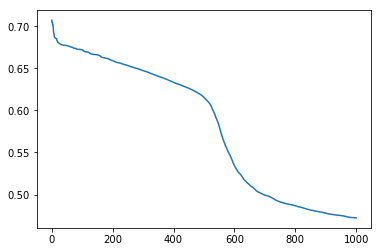

In [20]:
plt.plot(model.getErrorTrace())

In [32]:
model = trainNN(Xtrain,Ttrain,[[128,64,32,64,128],2000])
rmse = evaluateNN(model,Xtest,Ttest)

training model...
trained model  NeuralNetwork(10, [128, 64, 32, 64, 128], 1)
   Network was trained for 2001 iterations. Final error is 0.43082969377085323.  for  578.8522765636444 seconds


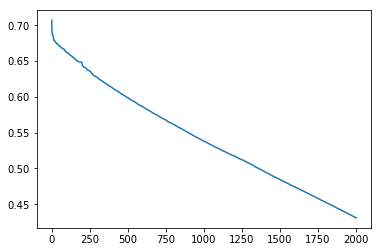

In [33]:
plt.plot(model.getErrorTrace())

In [34]:
rmse = evaluateNN(model, Xtest, Ttest)

In [35]:
rmse

0.3708627411513859

In [43]:
parms = [[[5,3,5],1000],[[10,5,10],1000]]

0.981538313786 1.7125215935e-07 0.745732174764
2.02620696034 1.65249347435e-08 0.745732174764
3.4606505468 7.11566909803e-12 0.745732174764


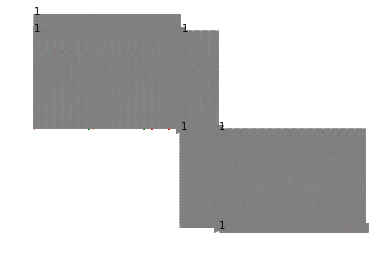

In [38]:
model.draw()

In [62]:
networkStructures = [[[5, 3, 5], 1], [[10, 5, 10], 1]]
iterations = [100, 200]
networkParams = itertools.product(networkStructures, iterations)

In [64]:
params = []
for k in networkParams:
    params.append([Xtrain, Ttrain, k])

In [68]:
if __name__ == '__main__':
    pool = mp.Pool()
    results = pool.map(trainNNWorker, params)
    print(results)

[]
